# Volatility
- https://www.investopedia.com/terms/v/volatility.asp
- Why log returns
    - https://quantivity.wordpress.com/2011/02/21/why-log-returns/

### Standard deviation

- $\sigma_{p} = \sigma_{daily}\times \sqrt{p}$
- $\sigma_{annually} = \sigma_{daily}\times \sqrt{252}$
 
    *(252 trading days per year)*



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
# 15% 20% 20% 15%
100*(1 + .15)*1.2*1.2*1.15

190.43999999999994

In [4]:
# 60% -40% %120 -10%
100*1.6*0.6*2.2*0.9

190.08

In [5]:
df = pd.DataFrame({'A': [1.15, 1.2, 1.2, 1.15], 'B': [1.6, 0.6, 2.2, 0.9]})

In [6]:
df

,A,B
0,1.15,1.6
1,1.20,0.6
2,1.20,2.2
3,1.15,0.9


In [8]:
df.std()*(4**0.5)

A    0.057735
B    1.436431
dtype: float64

### Log returns

In [9]:
1.15*1.2

1.38

In [10]:
1.15 + 1.2

2.3499999999999996

In [11]:
np.log(1.15), np.log(1.2)

(0.13976194237515863, 0.1823215567939546)

In [12]:
np.log(1.15) + np.log(1.2)

0.3220834991691132

In [13]:
np.log(1.15*1.2)

0.3220834991691132

### Example

In [14]:
ticker = "FB"
data = pd.read_csv("ticker-" + ticker.lower() + ".csv", index_col=0, parse_dates=True)

In [16]:
data['Log returns'] = np.log(data['Adj Close']/data['Adj Close'].shift())

In [17]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,Log returns
Date,,,,,,,
2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900,181.419998,NaN
2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600,184.669998,0.017756
2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900,184.330002,-0.001843
2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500,186.850006,0.013579
2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700,188.279999,0.007624


In [18]:
data['Volatility'] = data['Log returns'].rolling(252).std()*(252**0.5)

In [19]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,Log returns,Volatility
Date,,,,,,,,
2020-12-24,270.399994,266.200012,268.880005,267.399994,6702000,267.399994,-0.002652,0.460331
2020-12-28,277.299988,265.660004,268.739990,277.000000,23299700,277.000000,0.035272,0.461605
2020-12-29,280.510010,276.279999,276.950012,276.779999,16383000,276.779999,-0.000795,0.461214
2020-12-30,278.079987,271.709991,277.950012,271.869995,11803800,271.869995,-0.017899,0.461600
2020-12-31,277.089996,269.809998,272.000000,273.160004,12892900,273.160004,0.004734,0.461146


In [20]:
current_volatility = data['Volatility'].iloc[-1]

In [21]:
current_volatility

0.46114568808171486

In [24]:
str_vol = str(round(current_volatility, 3)*100)

In [25]:
str_vol

'46.1'

<IPython.core.display.Javascript object>


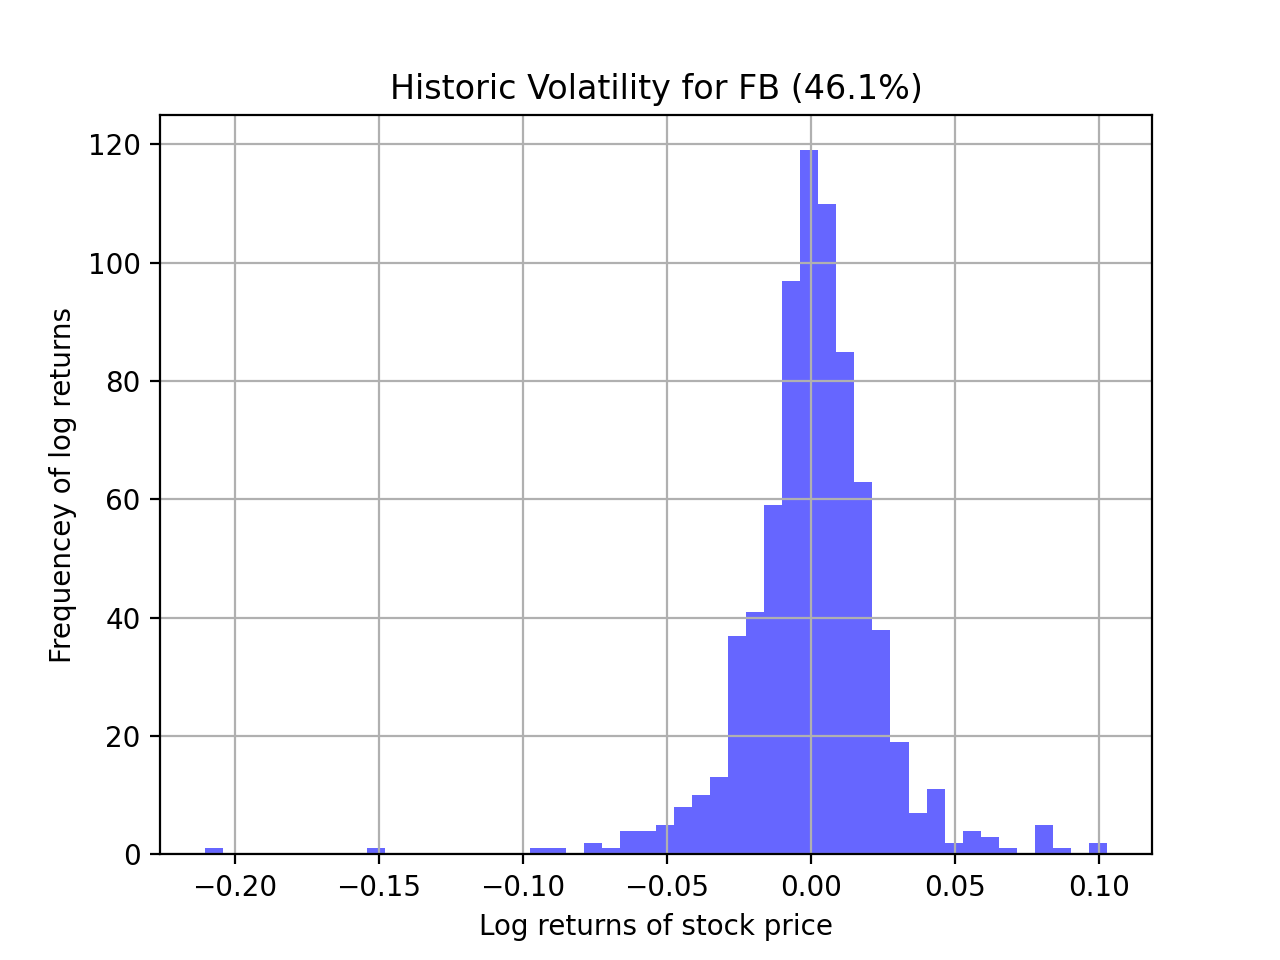

Text(0.5, 1.0, 'Historic Volatility for FB (46.1%)')

In [27]:
fig, ax = plt.subplots()
data['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel("Log returns of stock price")
ax.set_ylabel("Frequencey of log returns")
ax.set_title("Historic Volatility for " + ticker + " (" + str_vol +"%)")